In [1]:
from docx import Document
from docx.shared import Inches

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_iris = sns.load_dataset('iris')

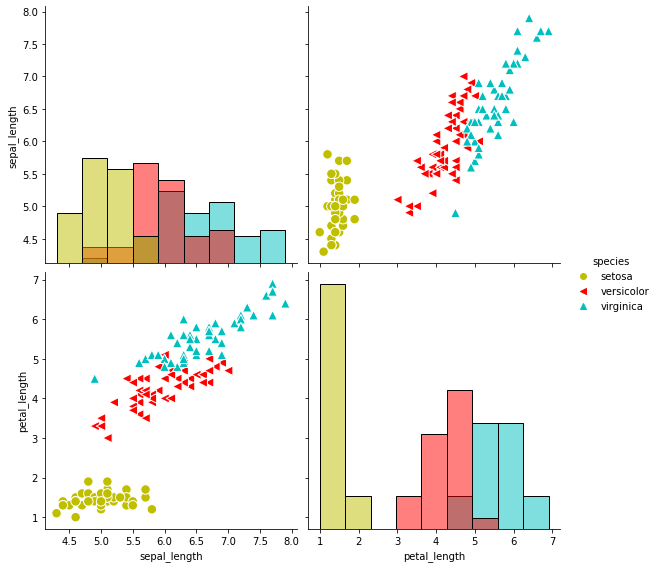

In [4]:
sns_plot = sns.pairplot(df_iris, 
             vars=['sepal_length', 'petal_length'], # Choose specific features to draw
             hue='species', # set hue parameter to column species
             diag_kind='hist', # choose between hist/kde
             markers=['o','<','^'], # For each type, set markertype
             height=4, # control figure size by setting height for each axes
             palette=['y','r','c'], #control marker colors
             plot_kws=dict(s=90, linewidth=1) #manage scatter point styles
            )

In [5]:
import io

image_stream = io.BytesIO()
sns_plot.savefig(image_stream)

In [6]:
document = Document()

document.add_heading('Document Title', 0)

p = document.add_paragraph('A plain paragraph having some ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

document.add_heading('Heading, level 1', level=1)
document.add_paragraph('Intense quote', style='Intense Quote')

document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)
document.add_paragraph(
    'first item in ordered list', style='List Number'
)

document.add_picture(image_stream, width=Inches(3.25))

records = (
    (3, '101', 'Lily'),
    (7, '422', 'Lotus'),
    (4, '631', 'Daisy')
)

table = document.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Qty'
hdr_cells[1].text = 'Id'
hdr_cells[2].text = 'Desc'
for qty, id, desc in records:
    row_cells = table.add_row().cells
    row_cells[0].text = str(qty)
    row_cells[1].text = id
    row_cells[2].text = desc

document.add_page_break()

In [7]:
document.save('Test.docx')